In [1]:
from NeuralNet import NeuralNet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from builtins import print
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
rawData = pd.read_csv('BSOM_DataSet_for_HW3.csv')
dataWithColumnsRequired = rawData[['all_mcqs_avg_n20', 'all_NBME_avg_n4', 'CBSE_01', 'CBSE_02','LEVEL']]
dataWithColumnsRequired.LEVEL.fillna('B',inplace=True)
dataWithColumnsRequiredWithoutNull = dataWithColumnsRequired.fillna(method='bfill')
x = dataWithColumnsRequiredWithoutNull.drop('LEVEL',axis=1).values
ynonfactor = dataWithColumnsRequiredWithoutNull.LEVEL
y= dataWithColumnsRequiredWithoutNull.LEVEL.replace(to_replace=['A', 'B','C','D'], value=[0,1,2,3])
XTrain,XTest,YTrain,YTest = train_test_split(x,y,test_size=0.25,shuffle=False)
XTrain.shape,XTest.shape,YTrain.shape,YTest.shape

((86, 4), (29, 4), (86,), (29,))

In [3]:
def evaluate(nn,x,y):
    yp = nn.predict(x)
    yt = pd.get_dummies(y).values
    ytl,ypl = y.values,np.argmax(yp,axis=1)
    sns.heatmap(confusion_matrix(ytl,ypl),annot=True)
    print("Presicion Score :", np.round(precision_score(ytl,ypl,average='weighted'),4))
    print("Recall Score :", np.round(recall_score(ytl,ypl,average='weighted'),4))
    print("F1 Score :", np.round(f1_score(ytl,ypl,average='weighted'),4))
    print("AUC Score :", np.round(roc_auc_score(yt,yp),4))
    plt.show()

#

## 

In [4]:
neural_ntwrk = NeuralNet(hidden_layers=1,hidden_units=5)
neural_ntwrk.fit(XTrain,YTrain)

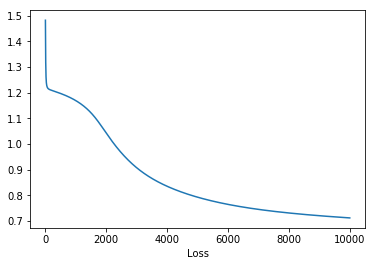

In [5]:
neural_ntwrk.loss_histry()

Presicion Score : 0.8008
Recall Score : 0.8276
F1 Score : 0.8134
AUC Score : 0.9176


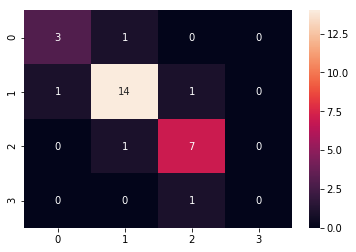

In [6]:
evaluate(neural_ntwrk,XTest,YTest)

### **Answers :**
* Neural Network with single Hidden layer and 5 Hidden units in hidden layer:
 * AUC is 0.92
 * Weight averaged Precision 0.80
 * Weight averaged Recall 0.83
 * Weight averaged F1-Score 0.81

##

For 3 Hidden units :
______________________________
Presicion Score : 0.6928
Recall Score : 0.6552
F1 Score : 0.6468
AUC Score : 0.8841


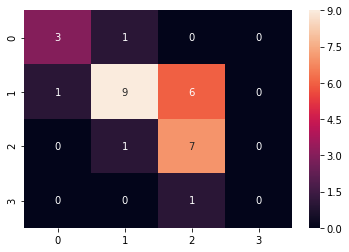

For 9 Hidden units :
______________________________
Presicion Score : 0.7747
Recall Score : 0.7931
F1 Score : 0.7807
AUC Score : 0.9215


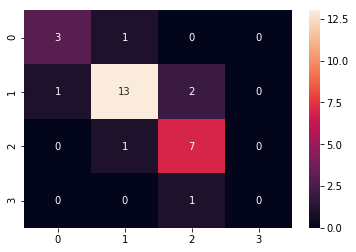

For 13 Hidden units :
______________________________
Presicion Score : 0.7356
Recall Score : 0.7586
F1 Score : 0.7465
AUC Score : 0.9188


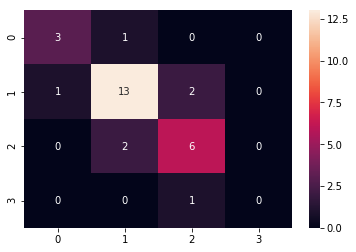

For 17 Hidden units :
______________________________
Presicion Score : 0.7647
Recall Score : 0.7931
F1 Score : 0.7785
AUC Score : 0.9007


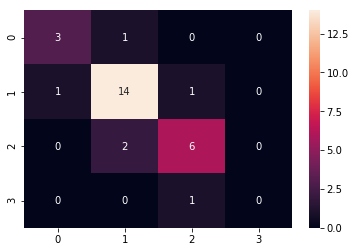

In [7]:
for hidden_nodes in [3,9,13,17]:
    print("For %d Hidden units :"%(hidden_nodes))
    print('_'*30)
    neural_ntwrk = NeuralNet(hidden_layers=1,hidden_units=hidden_nodes)
    neural_ntwrk.fit(XTrain,YTrain)
    evaluate(neural_ntwrk,XTest,YTest)
    print('='*50)

### **Answers :**
* Highest number of hidden units didn't lead to any perticular improvement.
* There is slight imrovement in AUC score, but lack's improvement in classification.
* Neural Network with single Hidden layer and 9 Hidden units in hidden layer:
 * AUC is 0.921
 * Weight averaged Precision 0.77
 * Weight averaged Recall 0.79
 * Weight averaged F1-Score 0.78

##

For 2 Hidden Layers :
______________________________
Presicion Score : 0.716
Recall Score : 0.6207
F1 Score : 0.6018
AUC Score : 0.8859


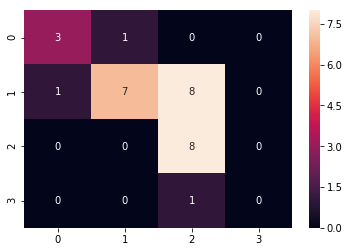

For 3 Hidden Layers :
______________________________
Presicion Score : 0.6794
Recall Score : 0.5517
F1 Score : 0.5177
AUC Score : 0.9115


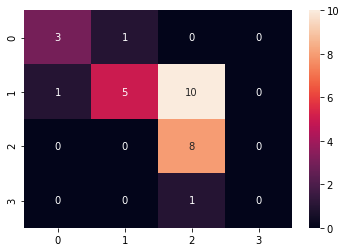

For 4 Hidden Layers :
______________________________
Presicion Score : 0.4906
Recall Score : 0.4828
F1 Score : 0.4521
AUC Score : 0.692


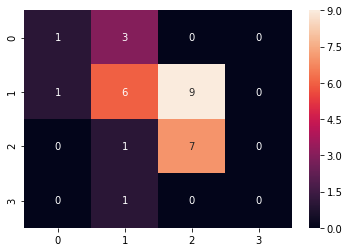

In [8]:
for hidden_layers in [2,3,4]:
    print("For %d Hidden Layers :"%(hidden_layers))
    print('_'*30)
    neural_ntwrk = NeuralNet(hidden_layers=hidden_layers,hidden_units=5)
    neural_ntwrk.fit(XTrain,YTrain)
    evaluate(neural_ntwrk,XTest,YTest)
    print('='*50)

### **Answers :**
* Adding more hidden layers lead to decrease in performace
* Neural Network with 2 Hidden layers and 2 Hidden units in each hidden layer:
 * AUC is 0.89
 * Weight averaged Precision 0.72
 * Weight averaged Recall 0.62
 * Weight averaged F1-Score 0.60

##
* F1-Score coulb be better for comparing performance because, F1-Score is maximum when Precision and Recall is maximum

#

##

For Regularization value : 0.050000
______________________________
Presicion Score : 0.6939
Recall Score : 0.7241
F1 Score : 0.7025
AUC Score : 0.8034


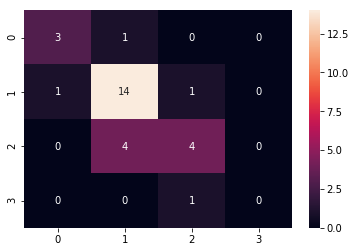

For Regularization value : 0.010000
______________________________
Presicion Score : 0.7747
Recall Score : 0.7931
F1 Score : 0.7807
AUC Score : 0.9072


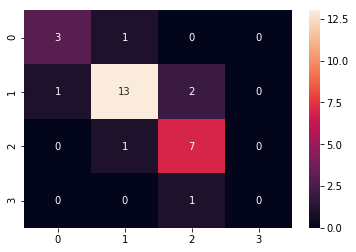

For Regularization value : 0.030000
______________________________
Presicion Score : 0.8008
Recall Score : 0.8276
F1 Score : 0.8134
AUC Score : 0.8283


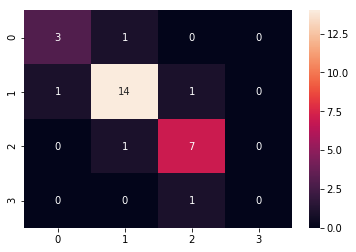

For Regularization value : 0.100000
______________________________
Presicion Score : 0.3044
Recall Score : 0.5517
F1 Score : 0.3923
AUC Score : 0.7947


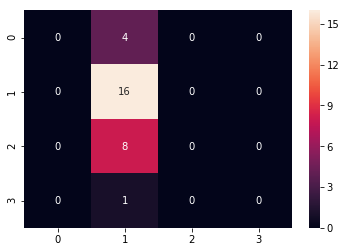

For Regularization value : 0.300000
______________________________
Presicion Score : 0.3044
Recall Score : 0.5517
F1 Score : 0.3923
AUC Score : 0.2701


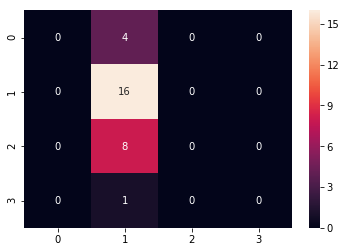

In [4]:
for regularization in [0.05,0.01,0.03,0.1,0.3]:
    print("For Regularization value : %f"%(regularization))
    print('_'*30)
    neural_ntwrk = NeuralNet(hidden_layers=1,hidden_units=5,lamda=regularization,Regularization='L1')
    neural_ntwrk.fit(XTrain,YTrain)
    evaluate(neural_ntwrk,XTest,YTest)
    print('='*50)

For Regularization value : 0.050000
______________________________
Presicion Score : 0.6939
Recall Score : 0.7241
F1 Score : 0.7025
AUC Score : 0.8034


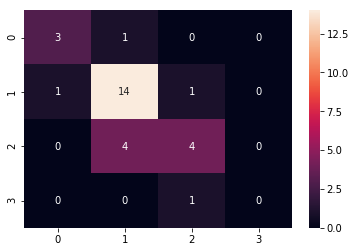

For Regularization value : 0.010000
______________________________
Presicion Score : 0.7747
Recall Score : 0.7931
F1 Score : 0.7807
AUC Score : 0.9072


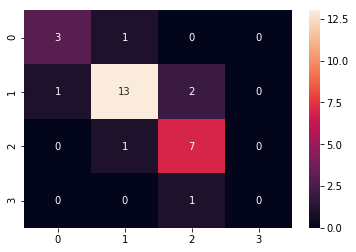

For Regularization value : 0.030000
______________________________
Presicion Score : 0.8008
Recall Score : 0.8276
F1 Score : 0.8134
AUC Score : 0.8283


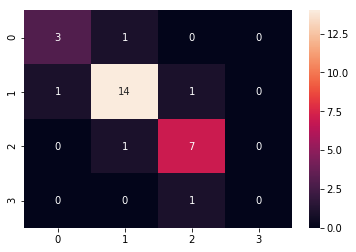

For Regularization value : 0.100000
______________________________
Presicion Score : 0.3044
Recall Score : 0.5517
F1 Score : 0.3923
AUC Score : 0.7947


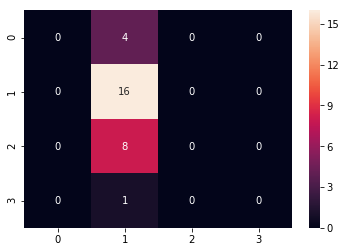

For Regularization value : 0.300000
______________________________
Presicion Score : 0.3044
Recall Score : 0.5517
F1 Score : 0.3923
AUC Score : 0.2701


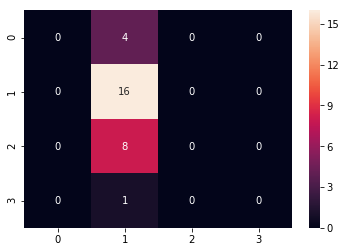

In [6]:
for regularization in [0.05,0.01,0.03,0.1,0.3]:
    print("For Regularization value : %f"%(regularization))
    print('_'*30)
    neural_ntwrk = NeuralNet(hidden_layers=1,hidden_units=5,lamda=regularization,Regularization='L1')
    neural_ntwrk.fit(XTrain,YTrain)
    evaluate(neural_ntwrk,XTest,YTest)
    print('='*50)

### **Answers :**
* There is slight improvement in AUC by implimenting Regularization.
* Increse in Regularization lead to underfit.
* Neural Network with Regularization value 0.01:
 * AUC is 0.91
 * Weight averaged Precision 0.77
 * Weight averaged Recall 0.79
 * Weight averaged F1-Score 0.78

##

For Initializing with random value
______________________________
Presicion Score : 0.8008
Recall Score : 0.8276
F1 Score : 0.8134
AUC Score : 0.9176


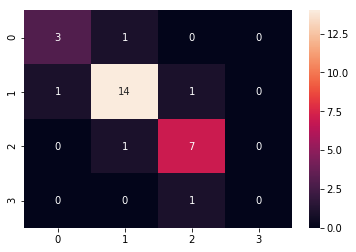

For Initializing with same value
______________________________
Presicion Score : 0.8008
Recall Score : 0.8276
F1 Score : 0.8134
AUC Score : 0.834


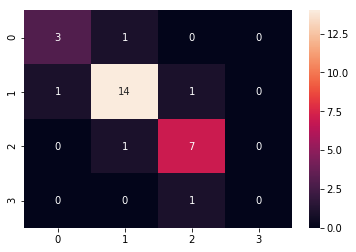

In [11]:
w8s = []
for init in ['random','same']:
    print("For Initializing with %s value"%(init))
    print('_'*30)
    neural_ntwrk = NeuralNet(hidden_layers=1,hidden_units=5,initialization=init)
    neural_ntwrk.fit(XTrain,YTrain)
    w8s.append(neural_ntwrk.neuralNetwork)
    evaluate(neural_ntwrk,XTest,YTest)
    print('='*50)

In [18]:
print('Weights of Neural Network with Initialization with Random values :')
print('-'*70)
w8s[0]['w1'],w8s[0]['w2']

Weights of Neural Network with Initialization with Random values :
----------------------------------------------------------------------


(array([[-1.11759935,  1.57208212,  0.23774468,  0.51274328,  0.06259475],
        [-1.67752081,  1.65730799,  1.78680414,  0.51723079,  0.67798258],
        [ 0.96304813, -0.15205388, -1.07225068, -0.45125047,  0.39911254],
        [-3.29310074,  1.67674884,  3.81059801,  1.71386285,  2.13622662]]),
 array([[-4.13515711,  1.09986298,  3.15879381,  2.11043473],
        [ 2.96754469,  0.61862049, -2.205165  , -0.2638798 ],
        [ 5.00200056, -0.46151109, -1.48352608, -1.67521068],
        [ 2.48184668,  0.31271126,  0.0930693 , -0.48763745],
        [ 2.82214209,  0.79498394,  0.18566757, -1.20484981]]))

In [20]:
print('Weights of Neural Network with Initialization with Same value :')
print('-'*70)
w8s[1]['w1'],w8s[1]['w2']

Weights of Neural Network with Initialization with Same value :
----------------------------------------------------------------------


(array([[ 0.82964451,  0.82964451,  0.82964451,  0.82964451,  0.82964451],
        [ 1.03652445,  1.03652445,  1.03652445,  1.03652445,  1.03652445],
        [-0.08629642, -0.08629642, -0.08629642, -0.08629642, -0.08629642],
        [ 2.18599985,  2.18599985,  2.18599985,  2.18599985,  2.18599985]]),
 array([[ 3.49240851,  0.86032276, -0.4551506 ,  0.10241933],
        [ 3.49240851,  0.86032276, -0.4551506 ,  0.10241933],
        [ 3.49240851,  0.86032276, -0.4551506 ,  0.10241933],
        [ 3.49240851,  0.86032276, -0.4551506 ,  0.10241933],
        [ 3.49240851,  0.86032276, -0.4551506 ,  0.10241933]]))

### Answers:
* When weights of neural network is initialized with same value we can observe there's a decrease in performance.
* We can observe that weights are very similar across layer when initialized with same value.

#

##

In [56]:
from sklearn.ensemble import RandomForestClassifier
xt = rawData
xt.fillna(method='ffill',inplace=True)
xt.fillna(0,inplace=True)
x = xt.drop('LEVEL',axis=1)
y = xt.LEVEL
clf = RandomForestClassifier().fit(x,y)
x.columns[np.argsort(-clf.feature_importances_)[:30]]

Index(['STEP_1', 'B2E_MCQ4_TOT', 'BCR_MCQ4_TOT', 'HD_PI_AVG_15', 'O1_O2_NBME',
       'B2E_PI_AVG_30', 'SA_MCQ1_IND', 'SA_NBME', 'HA_PI_04', 'SA_IRAT_02',
       'SA_IRAT_AVG_07', 'B2E_NBME_final', 'O2_MCQ_AVG_03', 'O1_MCQ3_TOT',
       'SA_PI_AVG_26', 'O1_PI_AVG_13', 'B2E_PI_22', 'SA_PI_09', 'SA_IRAT_03',
       'BCR_NBME_final', 'B2E_IRAT_03', 'O1_MCQ2_IND', 'HA_IRAT_01',
       'O1_MCQ_AVG_03', 'O1_IRAT_09', 'O2_MCQ3_IND', 'BCR_PI_27', 'O1_PI_11',
       'B2E_MCQ2_TOT', 'BCR_PI_02'],
      dtype='object')

In [5]:
dataWithColumnsRequired = rawData[['all_mcqs_avg_n20' ,'all_NBME_avg_n4', 'CBSE_01', 'CBSE_02', 'HD_PI_AVG_15' ,'LEVEL']]
dataWithColumnsRequired.LEVEL.fillna('B',inplace=True)
dataWithColumnsRequiredWithoutNull = dataWithColumnsRequired.fillna(method='bfill')
x = dataWithColumnsRequiredWithoutNull.drop('LEVEL',axis=1).values
ynonfactor = dataWithColumnsRequiredWithoutNull.LEVEL
y= dataWithColumnsRequiredWithoutNull.LEVEL.replace(to_replace=['A', 'B','C','D'], value=[0,1,2,3])
XTrain,XTest,YTrain,YTest = train_test_split(x,y,test_size=0.25,shuffle=False)
XTrain.shape,XTest.shape,YTrain.shape,YTest.shape

((86, 5), (29, 5), (86,), (29,))

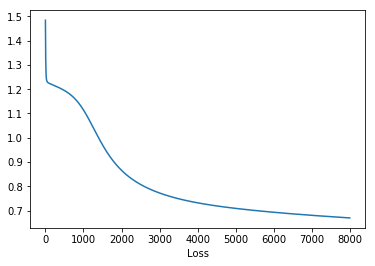

In [7]:
neural_ntwrk = NeuralNet(hidden_layers=1,hidden_units=5,learning_rate=0.1,n_epochs=8000,Regularization=0.01)
neural_ntwrk.fit(XTrain,YTrain)
neural_ntwrk.loss_histry()

Presicion Score : 0.7647
Recall Score : 0.7931
F1 Score : 0.7785
AUC Score : 0.9261


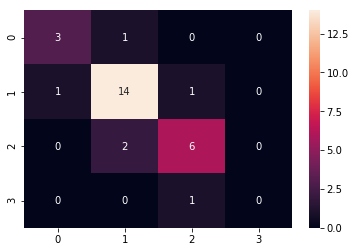

In [173]:
evaluate(neural_ntwrk,XTest,YTest)

### **Answers :**
 * AUC is 0.93
 * Weight averaged Precision 0.76
 * Weight averaged Recall 0.79
 * Weight averaged F1-Score 0.78

##

In [15]:
dataWithColumnsRequired = rawData[['all_mcqs_avg_n20','HD_PI_AVG_15' ,'all_NBME_avg_n4', 'CBSE_01', 'CBSE_02','O1_PI_AVG_13' ,'LEVEL']]
dataWithColumnsRequired.LEVEL.fillna('B',inplace=True)
dataWithColumnsRequiredWithoutNull = dataWithColumnsRequired.fillna(method='bfill')
x = dataWithColumnsRequiredWithoutNull.drop('LEVEL',axis=1).values
ynonfactor = dataWithColumnsRequiredWithoutNull.LEVEL
y= dataWithColumnsRequiredWithoutNull.LEVEL.replace(to_replace=['A', 'B','C','D'], value=[0,1,2,3])
XTrain,XTest,YTrain,YTest = train_test_split(x,y,test_size=0.25,shuffle=False)
XTrain.shape,XTest.shape,YTrain.shape,YTest.shape

((86, 6), (29, 6), (86,), (29,))

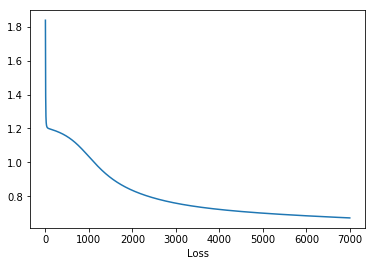

In [18]:
neural_ntwrk = NeuralNet(hidden_layers=1,hidden_units=5,learning_rate=0.1,n_epochs=7000,Regularization=0.01)
neural_ntwrk.fit(XTrain,YTrain)
neural_ntwrk.loss_histry()

Presicion Score : 0.8164
Recall Score : 0.8276
F1 Score : 0.8139
AUC Score : 0.9373


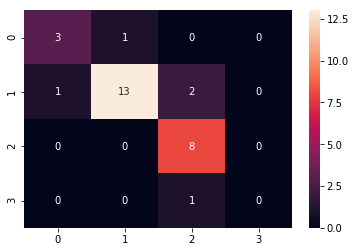

In [167]:
evaluate(neural_ntwrk,XTest,YTest)

### **Answers :**
 * AUC is 0.94
 * Weight averaged Precision 0.82
 * Weight averaged Recall 0.83
 * Weight averaged F1-Score 0.81